## All you need is love… And a pet!

<img src="img/dataset-cover.jpg" width="920">

Here we are going to build a classifier to predict whether an animal from an animal shelter will be adopted or not (aac_intakes_outcomes.csv, available at: https://www.kaggle.com/aaronschlegel/austin-animal-center-shelter-intakes-and-outcomes/version/1#aac_intakes_outcomes.csv). You will be working with the following features:

1. *animal_type:* Type of animal. May be one of 'cat', 'dog', 'bird', etc.
2. *intake_year:* Year of intake
3. *intake_condition:* The intake condition of the animal. Can be one of 'normal', 'injured', 'sick', etc.
4. *intake_number:* The intake number denoting the number of occurrences the animal has been brought into the shelter. Values higher than 1 indicate the animal has been taken into the shelter on more than one occasion.
5. *intake_type:* The type of intake, for example, 'stray', 'owner surrender', etc.
6. *sex_upon_intake:* The gender of the animal and if it has been spayed or neutered at the time of intake
7. *age_upon\_intake_(years):* The age of the animal upon intake represented in years
8. *time_in_shelter_days:* Numeric value denoting the number of days the animal remained at the shelter from intake to outcome.
9. *sex_upon_outcome:* The gender of the animal and if it has been spayed or neutered at time of outcome
10. *age_upon\_outcome_(years):* The age of the animal upon outcome represented in years
11. *outcome_type:* The outcome type. Can be one of ‘adopted’, ‘transferred’, etc.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp
from itertools import combinations 
import ast
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sn
%matplotlib inline

data_folder = './data/'

### A) Load the dataset and convert categorical features to a suitable numerical representation (use dummy-variable encoding). 
- Split the data into a training set (80%) and a test set (20%). Pair each feature vector with the corresponding label, i.e., whether the outcome_type is adoption or not. 
- Standardize the values of each feature in the data to have mean 0 and variance 1.

The use of external libraries is not permitted in part A, except for numpy and pandas. 
You can drop entries with missing values.

In [2]:
columns = ['animal_type', 'intake_year', 'intake_condition', 'intake_number', 'intake_type', 'sex_upon_intake', \
          'age_upon_intake_(years)', 'time_in_shelter_days', 'sex_upon_outcome', 'age_upon_outcome_(years)', \
          'outcome_type']
original_data = pd.read_csv(data_folder+'aac_intakes_outcomes.csv', usecols=columns)
original_data.sample(5)

,outcome_type,sex_upon_outcome,age_upon_outcome_(years),animal_type,intake_condition,intake_type,sex_upon_intake,age_upon_intake_(years),intake_year,intake_number,time_in_shelter_days
18549,Adoption,Spayed Female,0.657534,Dog,Normal,Stray,Intact Female,0.575342,2014,1.0,4.076389
7361,Died,Unknown,0.328767,Cat,Injured,Stray,Unknown,0.328767,2013,1.0,26.459722
1593,Return to Owner,Spayed Female,5.000000,Dog,Normal,Stray,Spayed Female,5.000000,2016,1.0,3.943750
77636,Adoption,Neutered Male,9.000000,Dog,Normal,Stray,Intact Male,9.000000,2018,1.0,57.984722
6031,Adoption,Neutered Male,0.657534,Dog,Sick,Stray,Intact Male,0.657534,2013,1.0,26.120833


In [3]:
# Delete unlabeled rows
data = original_data.dropna(subset="outcome_type")

# Convert adoption status into a boolean
non_adoption_status = list(data.drop_duplicates(subset="outcome_type")["outcome_type"])
non_adoption_status.remove('Adoption')
data = pd.concat([data, pd.get_dummies(data["outcome_type"])], axis=1)
data = data.drop(non_adoption_status + ["outcome_type"], axis=1)
 
# Transform categorical features into booleans
categorical_features = ["sex_upon_outcome", "animal_type", "intake_condition", "intake_type", "sex_upon_intake"]
data = pd.concat([data, pd.get_dummies(data[categorical_features])], axis=1)
data = data.drop(categorical_features, axis=1)

# Normalize continuous features
continuous_features = ["age_upon_outcome_(years)", "age_upon_intake_(years)", "intake_year", "intake_number", "time_in_shelter_days"]
data[continuous_features] = original_data[continuous_features]

def zscore(feature: str):
    data[feature] = (data[feature] - data[feature].mean())/data[feature].std()
    
for ind, feature in enumerate(continuous_features):
    zscore(feature)

data = data[sorted(data.columns)]
data.sample(5)

,Adoption,age_upon_intake_(years),age_upon_outcome_(years),animal_type_Bird,animal_type_Cat,animal_type_Dog,animal_type_Other,intake_condition_Aged,intake_condition_Feral,intake_condition_Injured,...,sex_upon_intake_Intact Male,sex_upon_intake_Neutered Male,sex_upon_intake_Spayed Female,sex_upon_intake_Unknown,sex_upon_outcome_Intact Female,sex_upon_outcome_Intact Male,sex_upon_outcome_Neutered Male,sex_upon_outcome_Spayed Female,sex_upon_outcome_Unknown,time_in_shelter_days
36210,1,0.308357,0.640439,0,0,1,0,0,0,1,...,1,0,0,0,0,0,1,0,0,6.631280
18419,1,-0.382928,-0.394020,0,0,1,0,0,0,0,...,0,1,0,0,0,0,1,0,0,-0.113946
50916,1,-0.702055,-0.710498,0,1,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0.343305
74121,1,-0.444480,-0.455426,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,-0.328552
51982,1,-0.382928,-0.394020,0,0,1,0,0,0,0,...,1,0,0,0,0,0,1,0,0,1.478228


In [4]:
data.columns

Index(['Adoption', 'age_upon_intake_(years)', 'age_upon_outcome_(years)',
       'animal_type_Bird', 'animal_type_Cat', 'animal_type_Dog',
       'animal_type_Other', 'intake_condition_Aged', 'intake_condition_Feral',
       'intake_condition_Injured', 'intake_condition_Normal',
       'intake_condition_Nursing', 'intake_condition_Other',
       'intake_condition_Pregnant', 'intake_condition_Sick', 'intake_number',
       'intake_type_Euthanasia Request', 'intake_type_Owner Surrender',
       'intake_type_Public Assist', 'intake_type_Stray',
       'intake_type_Wildlife', 'intake_year', 'sex_upon_intake_Intact Female',
       'sex_upon_intake_Intact Male', 'sex_upon_intake_Neutered Male',
       'sex_upon_intake_Spayed Female', 'sex_upon_intake_Unknown',
       'sex_upon_outcome_Intact Female', 'sex_upon_outcome_Intact Male',
       'sex_upon_outcome_Neutered Male', 'sex_upon_outcome_Spayed Female',
       'sex_upon_outcome_Unknown', 'time_in_shelter_days'],
      dtype='object')

In [5]:
# Divide the data to get 80% for training and 20% for testing 
X_train, X_test, Y_train, Y_test = train_test_split(data.drop("Adoption", axis=1),\
                                                    data[["Adoption"]],\
                                                    test_size=0.2,\
                                                    random_state=0,\
                                                    # each label is in the same proportions as in the original dataset in both training and test sets
                                                    stratify=data[["Adoption"]]) 

### B) Train a logistic regression classifier on your training set. Logistic regression returns probabilities as predictions, so in order to arrive at a binary prediction, you need to put a threshold on the predicted probabilities. 
- For the decision threshold of 0.5, present the performance of your classifier on the test set by displaying the confusion matrix. Based on the confusion matrix, manually calculate accuracy, precision, recall, and F1-score with respect to the positive and the negative class. 

In [6]:
# Logistic regression classifier
logistic = LogisticRegression(solver='lbfgs', max_iter=1000)
logistic.fit(X_train, Y_train["Adoption"])

probas = logistic.predict_proba(X_test) 

# Compute the predictions
def predict_adoption(probas, threshold):
    Y_predict = np.empty(len(probas))
    
    for ind, probas_row in enumerate(probas):
    # probas_row[0] correspond to "0" outcome
        if probas_row[0] > threshold:
            Y_predict[ind] = 0
        else:
            Y_predict[ind] = 1
    
    return Y_predict
    
# Compute performance indicators knowing the confusion matrix
def compute_performance(matrix):
    TP = matrix[0,0]
    TN = matrix[1,1]
    FP = matrix[1,0]
    FN = matrix[0,1]
    
    total = matrix.ravel().sum()
    accuracy =  (TP + TN) / total
    
    precision = TP / (TP + FP)    
    
    recall =  TP / (TP + FN)
    
    F1_score =  2 * (precision*recall) / (precision + recall)
    
    return [accuracy, precision, recall, F1_score]

In [7]:
# Compute the confusion matrix
matrix = confusion_matrix(Y_test, predict_adoption(probas, 0.5))
perfs = compute_performance(matrix)

print(f"Accuracy: {perfs[0]}")
print(f"Precision: {perfs[1]}")
print(f"Recall: {perfs[2]}")
print(f"F1_score: {perfs[3]}")

Accuracy: 0.8227577982802987
Precision: 0.8639781271360218
Recall: 0.8230952897764272
F1_score: 0.8430413517118719


### C) Vary the value of the threshold in the range from 0 to 1 and visualize the value of accuracy, precision, recall, and F1-score (with respect to both classes) as a function of the threshold.

In [8]:
thresholds = np.arange(0,1,0.025)
accuracies = []
precisions = []
recalls = []
F1_scores = []

for ind, threshold in enumerate(thresholds):
    Y_predict = predict_adoption(probas, threshold)
    matrix = confusion_matrix(Y_test, Y_predict)
    perfs = compute_performance(matrix)
    
    accuracies.append(perfs[0])
    precisions.append(perfs[1])
    recalls.append(perfs[2])
    F1_scores.append(perfs[3])

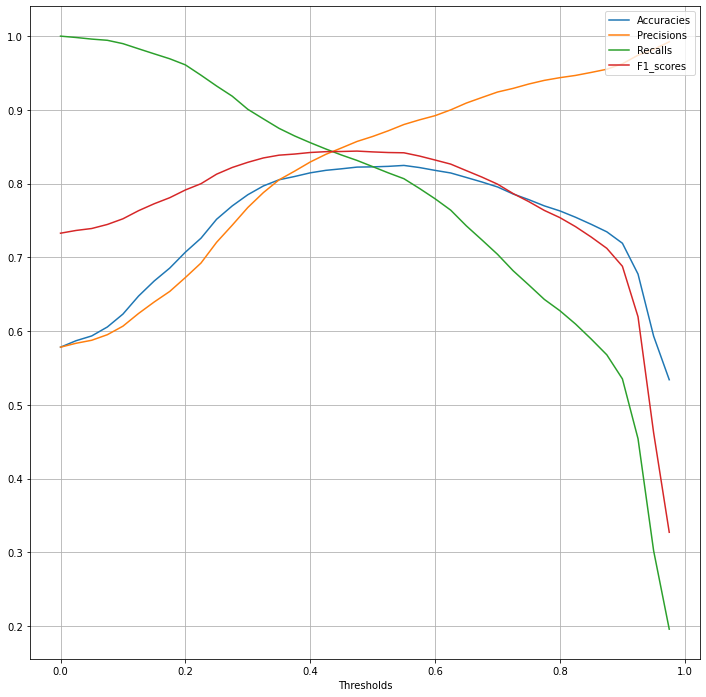

In [9]:
plt.figure(figsize=(12,12))
plt.plot(thresholds, accuracies,\
         thresholds, precisions,\
         thresholds, recalls,\
         thresholds, F1_scores)
plt.grid()
plt.legend(["Accuracies", "Precisions", "Recalls", "F1_scores"], loc="upper right")
plt.xlabel("Thresholds")
plt.show()

### D) Plot in a bar chart the coefficients of the logistic regression sorted by their contribution to the prediction.

In [72]:
# Create a DataFrame with the features associated with their coefficients
coeffs = []
for ind, value in enumerate(logistic.coef_.T):
    coeffs.append(float(logistic.coef_.T[ind]))
    
data = np.array([list(X_test.columns), coeffs]).T

df_coeffs = pd.DataFrame(columns = ['features'],\
                         data = list(X_test.columns))
df_coeffs["coeffs"] = coeffs
df_coeffs = df_coeffs.sort_values(by="coeffs", ascending=True).set_index("features")
df_coeffs.sample(5)

,coeffs
features,
intake_type_Stray,0.904369
sex_upon_intake_Spayed Female,-0.342765
sex_upon_outcome_Unknown,-1.213342
animal_type_Dog,-1.115654
intake_number,0.058670


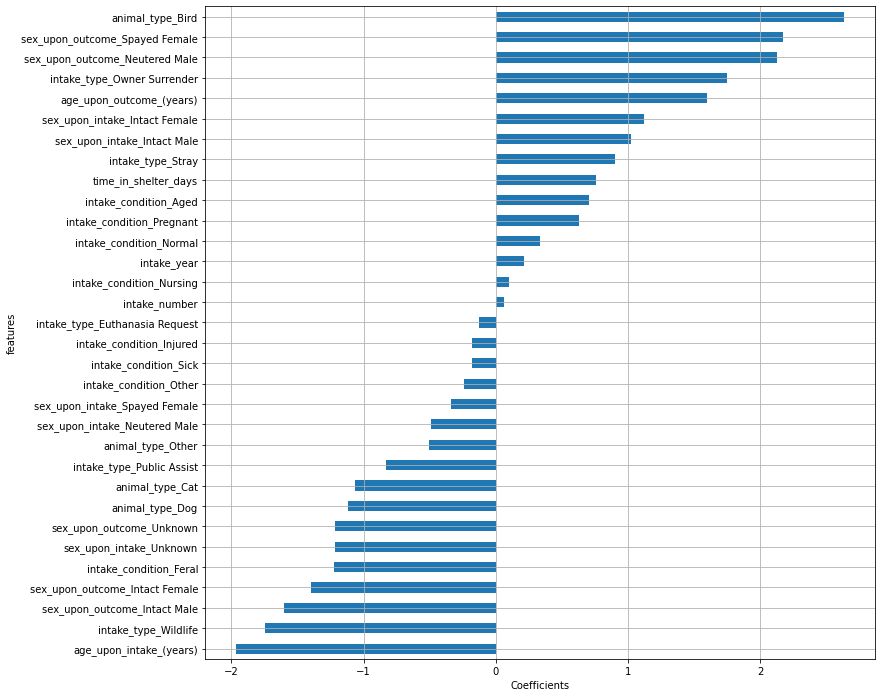

In [71]:
df_coeffs.plot(kind='barh',\
               figsize=(12,12),\
               grid=True,\
               xlabel="Coefficients",\
               legend=None)
plt.show()


## Question 1: Which of the following metrics is most suitable when you are dealing with unbalanced classes?

- a) F1 Score
- b) Recall
- c) Precision
- d) Accuracy

Answer: a

## Question 2: You are working on a binary classification problem. You trained a model on a training dataset and got the following confusion matrix on the test dataset. What is true about the evaluation metrics (rounded to the second decimal point):

|            | Pred = NO|Pred=YES|
|------------|----------|--------|
| Actual NO  |    50    |   10   |
| Actual YES |    5     |   100  |

- a) Accuracy is 0.95
- b) Accuracy is 0.85
- c) False positive rate is 0.95
- d) True positive rate is 0.95

Answer: d